In [55]:
import pandas_datareader as dr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [56]:
df = dr.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2019-12-17')

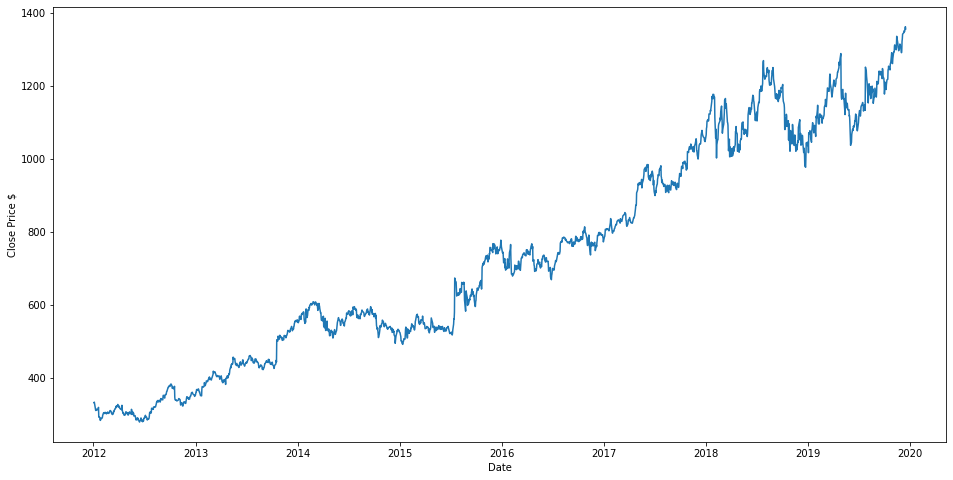

In [57]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.show()

In [58]:
import math
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset) * .8)

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

In [60]:
train_data = scaled_data[0:training_data_len , :]

x_tr=[]
y_tr=[]

In [61]:
for i in range(60 , len(train_data)):
  x_tr.append(train_data[i-60 : i, 0])
  y_tr.append(train_data[i,0])

In [62]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [64]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1543/1543 [==============================] - 47s 31ms/step - loss: 0.0013
Epoch 2/2
1543/1543 [==============================] - 46s 30ms/step - loss: 6.2796e-04


In [67]:
test_data = scaled_data[training_data_len-60 : , :]

x_test=[]
y_test=dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [68]:
x_test = np.array(x_test)

In [69]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [72]:
#Get the root mean sqaured error
rmse = np.sqrt(np.mean(predictions-y_test) **2)
rmse

4.449130249023438

In [73]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


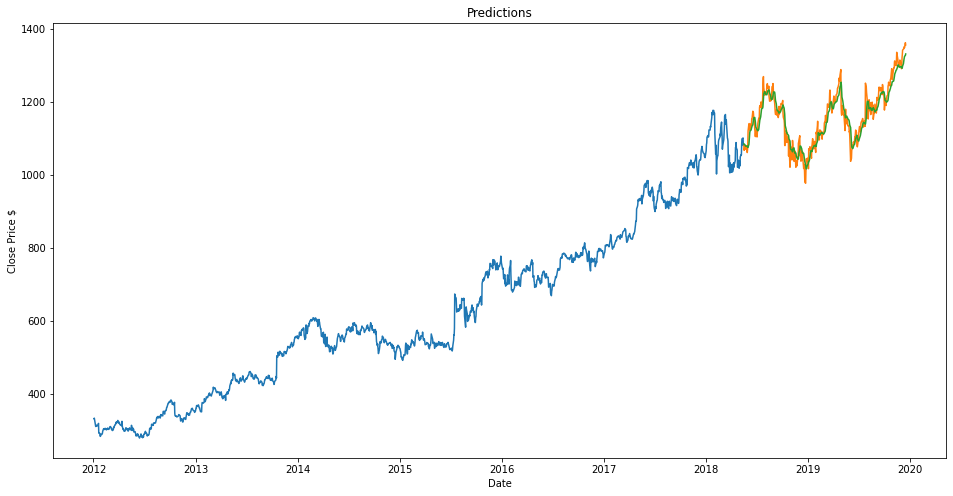

In [74]:
plt.figure(figsize=(16,8))
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()

In [75]:
valid

,Close,Predictions
Date,,
2018-05-17,1078.589966,1084.106567
2018-05-18,1066.359985,1083.704346
2018-05-21,1079.579956,1080.984375
2018-05-22,1069.729980,1079.832764
2018-05-23,1079.689941,1077.963379
...,...,...
2019-12-11,1345.020020,1315.543213
2019-12-12,1350.270020,1319.859375
2019-12-13,1347.829956,1323.765137
